In [45]:
import pandas as pd
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv('./data.csv')
df


,protocol_version,packet_length,seq_number,data_type,data_type_str,data_length,msg_type,msg_type_str,cfg2,b64_msg_buffer,msg_value
0,135,15,819,2,FLOAT,4,3,READ_TEMPERATURE,0,zcz0QQ==,30.600000
1,135,15,819,2,FLOAT,4,4,READ_PRESSURE,0,AAC1Qg==,90.500000
2,135,15,820,2,FLOAT,4,2,READ_WEIGHT,0,IF+EQQ==,16.546448
3,135,15,820,2,FLOAT,4,3,READ_TEMPERATURE,0,zcz0QQ==,30.600000
4,135,15,820,2,FLOAT,4,4,READ_PRESSURE,0,AAC1Qg==,90.500000
...,...,...,...,...,...,...,...,...,...,...,...
500,135,15,1014,2,FLOAT,4,2,READ_WEIGHT,0,2WuEQQ==,16.552660
501,135,15,1014,2,FLOAT,4,3,READ_TEMPERATURE,0,zcz0QQ==,30.600000
502,135,15,1014,2,FLOAT,4,4,READ_PRESSURE,0,AAC1Qg==,90.500000
503,135,15,1015,2,FLOAT,4,3,READ_TEMPERATURE,0,zcz0QQ==,30.600000


In [47]:
# data transformation
new_rows = {}
for _, row in df.iterrows():
    seq_num = row['seq_number']
    if row['seq_number'] not in new_rows:
        new_rows[seq_num] = {}
    msg_type = row['msg_type_str']
    new_rows[seq_num][msg_type] = row['msg_value']
trans_df = pd.DataFrame(new_rows).transpose()
trans_df


,READ_TEMPERATURE,READ_PRESSURE,READ_WEIGHT
819,30.6,90.5,NaN
820,30.6,90.5,16.546448
821,30.6,90.5,16.527811
822,30.6,90.5,NaN
823,30.6,90.5,16.552660
...,...,...,...
1011,30.6,90.5,16.541616
1012,30.6,90.5,NaN
1013,30.6,90.5,16.520218
1014,30.6,90.5,16.552660


In [48]:
# basic stats [READ_TEMPERATURE]
trans_df['READ_TEMPERATURE'].describe()


count    194.0
mean      30.6
std        0.0
min       30.6
25%       30.6
50%       30.6
75%       30.6
max       30.6
Name: READ_TEMPERATURE, dtype: float64

In [49]:
# basic stats [READ_PRESSURE]
trans_df['READ_PRESSURE'].describe()


count    195.0
mean      90.5
std        0.0
min       90.5
25%       90.5
50%       90.5
75%       90.5
max       90.5
Name: READ_PRESSURE, dtype: float64

In [50]:
# basic stats [READ_WEIGHT]
trans_df['READ_WEIGHT'].describe()


count    116.000000
mean      16.499133
std        0.125892
min       15.956244
25%       16.527293
50%       16.541962
75%       16.550763
max       16.600290
Name: READ_WEIGHT, dtype: float64

In [56]:
# clean NaN values
trans_df_means = trans_df.mean()
trans_df = trans_df.fillna(trans_df_means)


In [52]:
# utils
def plot_series(x: list, xlabel: str, values: list[dict]):
    plt.figure(figsize=(12, 6))
    plt.xlabel(xlabel)
    plt.grid()
    
    for series in values:
        series_name = series['name']
        y = series['y']
        plt.plot(x, y, label=series_name)
    
    plt.legend()
    plt.show()


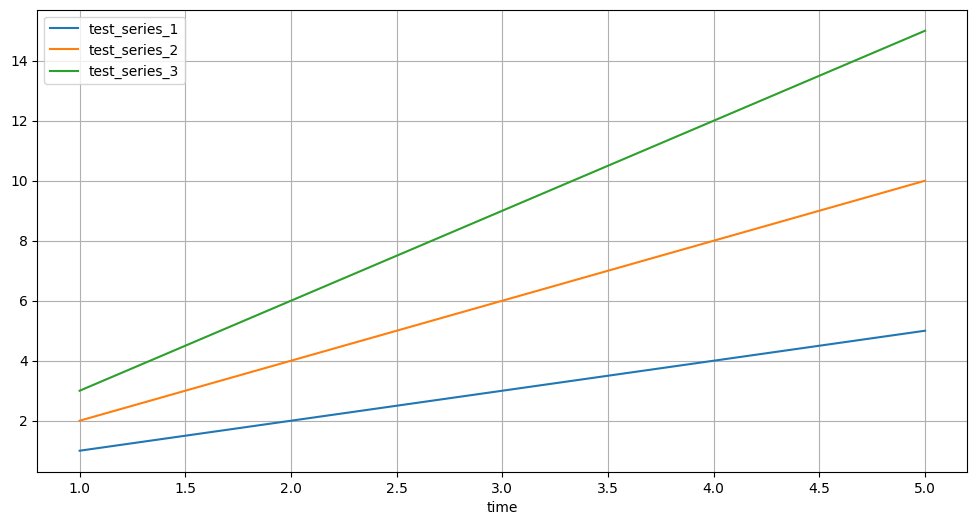

In [53]:
plot_series(
    x=[1, 2, 3, 4, 5],
    xlabel='time',
    values=[
        {
            'name': 'test_series_1',
            'y': [1, 2, 3, 4, 5],
        },
        {
            'name': 'test_series_2',
            'y': [2, 4, 6, 8, 10],
        },
        {
            'name': 'test_series_3',
            'y': [3, 6, 9, 12, 15],
        },
    ],
)


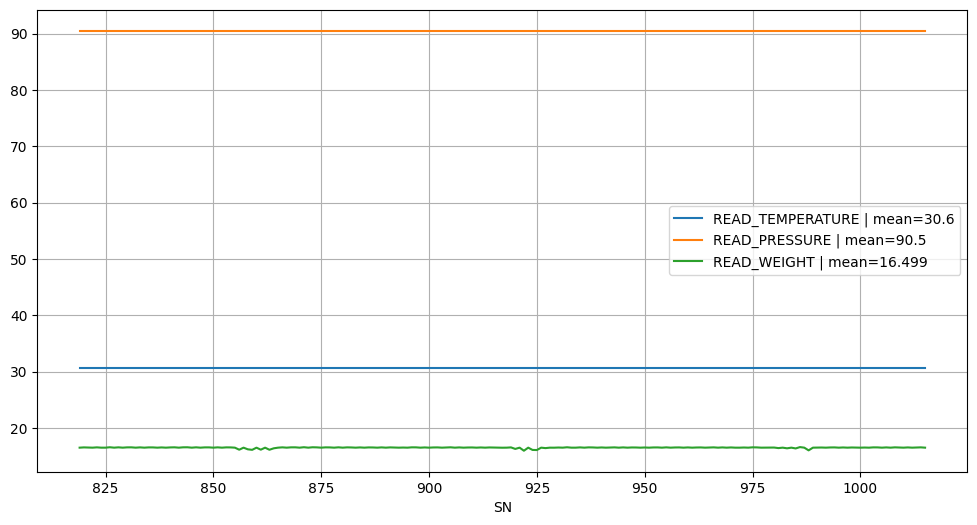

In [58]:
# plot data
x = trans_df.index.to_list()
values = [{'name': f"{s} | mean={round(trans_df_means[s], 3)}", 'y': trans_df[s].to_list()} for s in ['READ_TEMPERATURE', 'READ_PRESSURE', 'READ_WEIGHT']]
plot_series(
    x=x,
    xlabel='SN',
    values=values,
)
